In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
datetime_format = "%Y%m%d"

In [7]:
df = pd.read_csv("data.csv",encoding='euc-kr' )
df = df[["클러스터","확진일"]]
df['확진일'] = pd.to_datetime(df['확진일'], format='%Y%m%d')

ans=[]
results=[]
for i in range(1,449):
    x=df[df["클러스터"]==i]
    try:
        earliest_date = x['확진일'].min()
        latest_date = x['확진일'].max()

        days_diff = (latest_date - earliest_date).days
        ans.append((i,days_diff))
    except:
        print(i)
        pass
for i in ans:
    results.append(i[1])
    if i[1]>40:
        print(i[0])
print(results)

print('한 클러스터에서 같은날 전부 확진한 클러스터의 수 :',results.count(0))
print('전체 클러스터 개수 :',len(results))

108
[0, 2, 2, 1, 8, 2, 4, nan, 32, 2, 16, 19, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 3, 0, nan, 1, 0, 0, 12, 1, 0, 7, 0, 2, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 6, 0, 7, 8, 1, 0, 1, 1, 2, 0, 1, 0, 5, 2, 0, 4, 2, 0, 3, 2, 4, 0, 1, 1, 12, 0, 0, 2, 2, 0, 7, 1, 1, 3, 3, 2, 3, 2, 8, 6, 3, 2, 0, 6, 6, 1, 12, 1, 7, 3, 15, 1, 1, 3, 1, 7, 7, 7, 0, 0, 44, 2, 3, 3, 2, 3, 1, 19, 1, 1, 2, 2, 3, 4, 5, 4, 3, 3, 1, 13, 2, 1, 3, 1, 1, 5, 9, 2, 1, 6, 2, 2, 2, 4, 3, 11, 1, 1, 2, 1, 4, 2, 8, 7, 2, 4, 3, 5, 0, 2, 7, 3, 3, 5, 13, 7, 5, 14, 5, 7, 12, 6, 0, nan, 2, 7, 4, 4, 2, 3, 8, 13, 5, 4, 1, 1, 6, 0, 5, 6, 3, 3, 16, 5, 12, 7, 7, 3, 9, 11, 3, 1, 0, 3, 4, 6, 3, 2, 3, 2, 6, 4, 2, 2, 1, 3, 2, 2, 9, 12, 1, 3, 18, 2, 1, 1, 1, 2, 2, 13, 1, 4, 1, 1, 0, 9, 1, 0, 6, 0, 3, 4, 2, 2, 6, 4, 3, 4, 3, 2, 1, 5, 6, 3, 5, 1, 4, 7, 1, 5, 1, 7, 3, 6, 1, 3, 1, 3, 7, 2, 1, 6, 3, 5, 1, 6, 1, 2, 6, 9, 8, 2, 3, 1, 5, 2, 4, 2, 0, 4, 2, 10, 4, 17, 5, 2, 3, 2, 0, 4, 4, 2, 5, 1, 5, 2, 1, 10, 6, 5, 1, 4, 1, 7, 1, 5, 0, 15, 1, 1, 1, 6, 4, 13, 

(array([305.,  90.,  36.,   8.,   4.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <BarContainer object of 10 artists>)

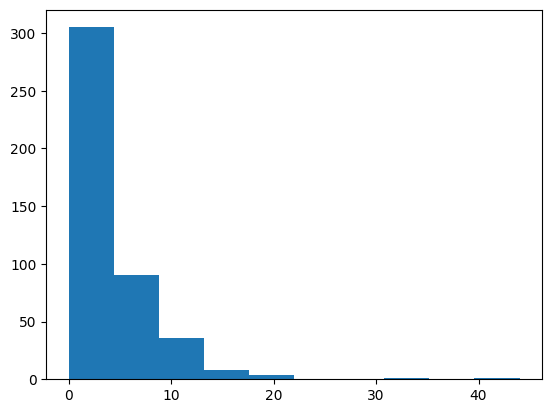

In [3]:
import matplotlib.pyplot as plt
plt.hist(results)

In [4]:
df = pd.read_csv("집단사례보고.csv",encoding='euc-kr' )
print(df.columns)
df= df[["클러스터","확진자"]]
diff=[]
for i in range(1,449):
    x=df[df["클러스터"]==i]
    try:
        z=len(x) - x["확진자"].iloc[0]
        diff.append(z)
        if z <-100:
            print(i)
    except:
        pass
import matplotlib.pyplot as plt
plt.hist(diff)

Index(['클러스터', '시리얼', '집단발병일', '증상발현일', '확진일', '장소', '장소_index', '주소',
       '주소_index', '신고지', '신고지_index', '성별', 'is_korean', '연령', '직업_index',
       'CT_R', 'CT_E', 'primary case', '접촉자', '방역수칙_sum', '위험도_sum',
       '감염경로종합평가', '개인위험특성', '감염장소위험특성', '백신접종사항'],
      dtype='object')


KeyError: "['확진자'] not in index"

## 본격적인 데이터 전처리

In [ ]:
df = pd.read_csv("집단사례보고.csv",encoding='euc-kr' )
cluster_df = df["장소"]
my_list = [s for s in cluster_df.unique() if not s.endswith(')')]

In [ ]:
mapping={'병원':12,
 '요양시설':11,
 '어린이집':18,
 '초등학교':9,
 '직장':7,
 '병원콜센터':6,
 '요양병원':12,
 '장애인거주시설':11,
 '물류센터':3,
 '자동차전시장':4,
 '사우나':8,
 '태권도장':14,
 '헬스장':14,
 '시청':8,
 '교회':13,
 '컨설팅업':7,
 '음료제조업':19,
 '다이어트장':14,
 '동호회':17,
 '대학교':9,
 '음식점':15,
 '학원':10,
 '학교':9,
 '광고물제조업':1,
 '세무사사무소':6,
 '당구장':14,
 '화장품제조업':1,
 '자동차연구소':6,
 '콜센터':6,
 '골판지제조업':5,
 '실내운동시설':14,
 '공장':1,
 '제조업':1,
 '불교':13,
 '단란주점':16,
 '연구기관':6,
 '자영업':15,
 '가구점':4,
 '이슬람사원':13,
 '농산물유통센터':4,
 '농산물제조판매업':19,
 '건설현장':2,
 '보험사':6,
 '축산업':19,
 '유흥주점':16,
 '장례식장':8,
 '건설회사':2,
 '생산공장':1,
 '농수산물류센터':4,
 '계란공장':19,
 '의료기매장':6,
 '지인모임':17,
 '유치원':18,
 '건축사무소':6,
 '학교급식실':9,
 '성당':13,
 '체대입시학원':14,
 '댄스학원':14,
 '어학원':10,
 '탁구장':14,
 '기숙학원':8,
 '고등학교':9,
 '특수학교':9,
 '보험회사':7,
 '반도체제조업':1,
 '보도방':16,
 '외국인숙소':8,
 '피아노학원':10,
 '보드게임장':17,
 '중학교':9,
 '의류공장':1,
 '보습학원':10,
 '음악학원':10,
 'KT본사':7,
 '제조업체생산라인':1,
 '신발제작공장':1,
 '제조업체':1,
 '화물운송협회':3,
 '자동차부품생산업체':1,
 '제조업공장':1,
 '자동차공장':1,
 '직업기술학원':10,
 '가공식품도매업':4,
 '제조업공장사내기숙사':8,
 '주점':16,
 '식료품제조업체':19,
 '무속신앙':13,
 '통신전선설치업체':6,
 '개인과외':17,
 '교육원':8,
 '사내기숙사':8,
 '노래방':16,
 '전자회사':7,
 '주짓수':14,
 '무에타이':14,
 '고시원':8,
 '식품제조업체':19,
 '도금업체':1,
 '가전제조판매업체':4,
 '산업체':1,
 '시멘트제조업체':1,
 '아이스링크장':14,
 '아파트건설현장':2,
 '고시텔':8,
 '대안학교':9,
 '자동차부품도장업체':6,
 '파이프가공공장':1,
 '주간보호센터':11,
 '공공기관':8,
 '육류가공업체':14,
 '렌탈업체':6,
 '대학교기숙사':8,
 'IT업':7,
 '플라스틱제조업':1,
 '사진스튜디오':6,
 '가구제조업':1,
 '전자부품제조업':1,
 '기계제조업':1,
 '자동차부품제조업':1,
 '장애인복지시설':11,
 '박스제조업':1,
 '장비제조업':1,
 '장비제조업(지인':1,
 '외국인근로자기숙사':8,
 '도장및피막처리업':1,
 '전자전기제품제조업':1,
 '인력사무소':6,
 '반도체장비부품가공업':1,
 '염료제조업':1,
 '건축제조업':1,
 '중공업':2,
 '알루미늄주조업':1,
 '축산물가공업':4,
 '모델하우스':6,
 '사료제조업':19,
 '인쇄업체':6,
 '영어학원':10,
 '마스크제조업':1,
 '콘크리트제조업':1,
 '금속처리업':1,
 '자동차정비업':6,
 '재활용품분류센터':5,
 '육류가공제조업':19,
 '농구단':14,
 '금속가공제품제조업':1,
 '냉장창고업':19,
 '여과기제조업':1,
 '식품제조업':19,
 '금형제조업':1,
 '코인노래방':16,
 '게임회사':7,
 '재활용업체':5,
 '원단제조업':1,
 '철강제조업':1,
 '고속도로사업소':6,
 '대학교체육부':14,
 '광학부품전문제조업':1,
 '건설업':2,
 '섬유가공업':1,
 '택배물류센터':4,
 '플라스틱용기제조업':1,
 '대형마트':4,
 '요양원':11,
 '골판지상자제조업':1,
 '식품가공업':19,
 '분양상담소':6,
 '농공시설업':1,
 '포장용상자제조업':1,
 'PC방':16,
 '염색가공업':4,
 '학교축구부':14,
 '대형마트물류센터':4,
 '섬유제조업':1,
 '양돈업':19,
 '전자상거래소매업':6,
 '종이제조업':1,
 '플라스틱재활용페기업체':5,
 '피혁가공판매업':5,
 '택배영업소':4,
 '간판제조업':1,
 '자동차판매업':4,
 '무역업':4,
 '피혁원단제조업':1,
 '대부중개업':6,
 '인쇄업':6,
 '태권도학원':10,
 '전자제품제조업':1,
 '의류선별및수출업':4,
 '창호제조업':1,
 '낙농제품제조업':19,
 '종교시설':13,
 '회사기숙사':8,
 '제조공장':1,
 '교욱원':10,
 '렌탈업쳬':6,
 '플라스틱재활용폐기업체':5
 }

In [ ]:
def remove_bracket(s):
    """
    문자열에서 괄호안의 문자를 제거하는 함수
    """
    idx = s.find('(') # 괄호 시작 위치 찾기
    if idx != -1:
        s = s[:idx] # 괄호 이전 문자열만 남기기
    return s

def replace_column(df, column_name):
    """
    데이터프레임의 특정 컬럼에서 괄호안의 문자를 제거하고, 괄호 밖의 문자만 남긴 새로운 컬럼을 생성하는 함수
    """
    new_column_name = column_name + '_index'
    df[new_column_name] = df[column_name].apply(remove_bracket)
    df[new_column_name] = df[new_column_name].str.replace('(', '').str.replace(')', '') # 괄호 제거
    return df

In [ ]:
df = pd.read_csv("집단사례보고.csv",encoding='euc-kr' )
df = replace_column(df, '장소')
df["장소"] = df["장소_index"].map(mapping)
df["장소클러스터"]=df["장소"]
df["장소"]=df["장소_index"]
df.drop("장소_index", axis=1, inplace=True)
df.to_csv("집단사례보고_수정_0329.csv",mode="w",encoding='euc-kr',index=False)


C:\Users\bubbl\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [14]:
def clean_value(value):
    if value =='강원시영월군':
        value = '영월군'
    if '시' in value and value != '시흥시':
        value = value.split('시')[0] + '시'
    if '연천' in value:
        value = '연천시'
    if '경기도' in value:
        value = value.replace('경기도 ', '')
    if '경기도' in value:
        value = value.replace('경기도', '')
    if '고양ㅅ' in value  or value == "덕양구" or value =='고양일산서구' or value =='고양덕양':
        value = '고양시'
    if '성남수분당구' in value:
        value = value.replace('성남수분당구', '성남시')
    if '안사시' in value:
        value = value.replace('안사시', '안산시')
    if value == '성북구'or value ==  '금천구'or value ==  '동대문구'or value ==  '구로구'or value ==  '동작구' or value ==  '영등포구' or value =="관악구" or value =="도봉구" or value =="용산구":
        value = '서울시'
    if value == "계양구" or value == '인천부평':
        value="인천시"
    if value == "의정뷧":
        value="의정부시"
    if value == "동두천":
        value="동두천시"
    if value == "양평":
        value="양평군"
    if value == "충북진천":
        value="진천군"
    if value == "충남부여":
        value="부여군"
    if value == "강원도철원군":
        value="철원군"
    if value == "경남고성군":
        value="고성군"
    if value == "충남당진":
        value="당진시"
    if value == "전북전주":
        value="전주시"
    if value == "충남태안":
        value="태안군"
    if value == "충북충주":
        value="충주시"
    if value == "강원춘천":
        value="춘천시"
    if value == "포천":
        value="포천시"
    if value == "경북고창":
        value="고창군"
    return value

In [33]:
df = pd.read_csv("집단사례보고.csv",encoding='euc-kr' )
df['주소'] = df['주소'].apply(clean_value)

df["주소"].unique()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 2: invalid start byte

In [36]:
df = pd.read_csv("집단사례보고_raw.csv" )
df["주소"].unique()

array(['광주시', '경기도 부천시', '경기도 안양시 만안구', '경기도 용인시 기흥구', '경기도 파주시',
       '경기도 고양시 일산동구', '경기도 평택시', '경기도 고양시 일산 동구', '경기도 광주시', '경기도의정부시',
       '경기도양평시', '경기도성남시분당구', '경기도성남시중원구', '경기도화성시', '경기도남양주시진전읍',
       '경기도남양주시', '경기도용인시기흥구', '경기도광주시', '경기도성남시수정구', '경기도하남시', '수원시',
       '수원시팔달구', '안산시', '안양시동안구', '과천시', '구리시', '포천시', '광명시', '김포시',
       '고양시덕양구', '남양주시', '성남시중원구', '안양시만안구', '의정부시', '용인시기흥구', '화성시',
       '하남시', '고양시', '오산시', '군포시', '안성시', '부천시', '여주시', '성남시분당구',
       '용인시처인구', '안산시단원구', '평택시포승읍', '성남시수정구', '시흥시', '의왕시', '성남시', '이천시',
       '하남시풍산점', '수원시권선구', '가평군', '안양시', '용인시', '수원시장안구', '고양시일산동구',
       '이천시마장면', '안산시상록구', '동두천시', '안양시범계', '연천군', '수원시영통구', '파주시',
       '부천시신상로', '화성시남양읍', '양주시', '양주시광적면', '의정부시송산로', '이천시호법면', '평택시충북읍',
       '하남시광암동', '파주시파주읍', '오산시동부대로', '화성시향남읍', '이천시발부읍', '용인시수지구',
       '화성시봉담읍', '안성시일죽면', '고양시일산서구', '오산시경기동로', '양주시백석읍', '안성시보개면',
       '김포시대곶면', '화성시마도면', '화성시양감면', '평택시', '평택시고덕면', '연천군전곡읍', '안성시원곡면',
       '오산시원동', '파주시

In [ ]:
add_map={'광주시':0, '부천시':1, '안양시':2, '용인시':3, '파주시':4, '고양시':5, '평택시':6, '의정부시':7, '양평시':8,
       '성남시':9, '화성시':10, '남양주시':11, '하남시':12, '수원시':13, '안산시':14, '과천시':15, '구리시':16, '포천시':17,
       '광명시':18, '김포시':19, '오산시':20, '군포시':21, '안성시':22, '여주시':23, '시흥시':24, '의왕시':25, '이천시':26,
       '가평군':27, '동두천시':28, '연천군':29, '양주시':30}

In [ ]:
df['주소_index']=df['주소'].map(add_map)
df.to_csv("집단사례보고_수정_0329.csv",mode="w",encoding='euc-kr',index=False)

In [29]:
def clean_value_rep(value):
    # if value =='강원시영월군':
    #     value = '영월군'
    # if '시' in value and value != '시흥시':
    #     value = value.split('시')[0] + '시'
    if '연천시' in value:
        value = '연천군'
    # if '경기도' in value:
    #     value = value.replace('경기도 ', '')
    # if '경기도' in value:
    #     value = value.replace('경기도', '')
    # if '고양ㅅ' in value  or value == "덕양구" or value =='고양일산서구' or value =='고양덕양':
    #     value = '고양시'
    # if '성남수분당구' in value:
    #     value = value.replace('성남수분당구', '성남시')
    if value == '구로시'or value == '송파구'or value == '노원시':
        value = "서울시"
    if value =="부평시":
        value = '인천시'
    if value =="일산시":
        value = '고양시'
    if value == "대구시" or value == "천안시" or value == '충북시'or value == '전주시'or value == '춘천시'or value == '태안군'or value == '포항시'or value == '전남시'or value == '괴산시'or value == '울산시'or value == '.'or value == '충주시'or value == '청주시'or value == '충남시'or value == '전북고창'or value == '영월군'or value == '어루시'or value == '김천시'or value == '당진시'or value == '부산시'or value == '원주시'or value == '진천군'or value == '부여군'or value == '대전시'or value == '세종시'or value == '철원군'or value == '고성군':
        value="전국"
    return value

In [40]:
df = pd.read_csv("집단사례보고.csv",encoding='euc-kr' )
df['신고지']=df['신고지'].apply(clean_value_rep)
df['신고지'].unique()

array(['광주시', '부천시', '안양시', '용인시', '파주시', '서울시', '고양시', '평택시', '김포시',
       '양주시', '의정부시', '양평군', '성남시', '화성시', '남양주시', '수원시', '인천시', '전국',
       '하남시', '안산시', '과천시', '군포시', '구리시', '포천시', '광명시', '시흥시', '오산시',
       '의왕시', '안성시', '여주시', '이천시', '양평시', '가평군', '동두천시', '연천군'],
      dtype=object)

In [31]:
x=['광주시', '부천시', '안양시', '용인시', '파주시', '서울시', '고양시', '평택시', '김포시',
       '양주시', '의정부시', '양평군', '성남시', '화성시', '남양주시', '수원시', '인천시', '전국',
       '하남시', '안산시', '과천시', '군포시', '구리시', '포천시', '광명시', '시흥시', '오산시',
       '의왕시', '안성시', '여주시', '이천시', '양평시', '가평군', '동두천시', '연천군']
y=['광주시', '부천시', '안양시', '용인시', '파주시', '고양시', '평택시', '의정부시', '양평시',
       '성남시', '화성시', '남양주시', '하남시', '수원시', '안산시', '과천시', '구리시', '포천시',
       '광명시', '김포시', '오산시', '군포시', '안성시', '여주시', '시흥시', '의왕시', '이천시',
       '가평군', '동두천시', '연천군', '양주시']
result = list(set(x) - set(y))
print(result)

['전국', '인천시', '양평군', '서울시']


In [41]:
rep_map={'광주시':0, '부천시':1, '안양시':2, '용인시':3, '파주시':4, '고양시':5, '평택시':6, '의정부시':7, '양평시':8,
       '성남시':9, '화성시':10, '남양주시':11, '하남시':12, '수원시':13, '안산시':14, '과천시':15, '구리시':16, '포천시':17,
       '광명시':18, '김포시':19, '오산시':20, '군포시':21, '안성시':22, '여주시':23, '시흥시':24, '의왕시':25, '이천시':26,
       '가평군':27, '동두천시':28, '연천군':29, '양주시':30, '양평군':8, '인천시':31, "서울시":32, "전국":33}

In [43]:
df['신고지_index']=df['신고지'].map(rep_map)
df.to_csv("집단사례보고.csv",mode="w",encoding='euc-kr',index=False)

In [ ]:
df = pd.read_csv("집단사례보고_수정_0329.csv",encoding='euc-kr' )
df['성별'].unique()

array(['2', '1', '4', '3', '.'], dtype=object)

In [ ]:
def validate_date(x):
    if not isinstance(x, str) or len(x) != 8:
        # print(x)
        return False
    try:
        datetime.strptime(x, '%Y%m%d')
        return True
    except ValueError:
        # print(x,"ValueError")
        return False

In [44]:
df = pd.read_csv("집단사례보고.csv",encoding='euc-kr' )

for i in range(1,449):
    x=df[df["클러스터"]==i]
    try:
        mask = x['증상발현일'].apply(validate_date)
        result = mask.all()
        if not result :
            print(x['증상발현일'])
    except:
        print('error')
        pass

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [ ]:
df = pd.read_csv("집단사례보고.csv",encoding='euc-kr' )
mask = df['증상발현일'].apply(validate_date)
print(mask)

result = mask.all()

.
.
.
.
Asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
.
.
.
.
.
.
.
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
ASX
ASX
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
asx
as

In [56]:
df = pd.read_csv("집단사례보고_0404.csv",encoding='euc-kr' )
df["CT_R"] = df["CT_R"].fillna(df["CT_R"].mean())
df["CT_E"] = df["CT_E"].fillna(df["CT_E"].mean())

df.to_csv("집단사례보고_0404.csv",mode="w",encoding='euc-kr',index=False)

In [98]:
df = pd.read_csv("집단사례보고_0404.csv",encoding='euc-kr' )
df['연령'].replace('.', np.nan, inplace=True)
# print(df["연령"].unique())
plc_idx=[]
for i in range(1,20):
    x=df[df["장소_index"]==i]
    try:
        # if x["연령"].isna().values.any():
        #     x["연령"] = x["연령"].fillna(x["연령"].mean())
        #     print("결측", i, x["연령"].mean())
        plc_idx.append(x["연령"].astype("float").mean(skipna=True).round().astype("int32"))
        print(i,x["연령"].astype("float").mean(skipna=True).round().astype("int32"))
    except:
        # print(i)
        print(i)
        pass
    
print(plc_idx)

1 39
2 43
3 35
4 40
5 43
6 40
7 40
8 38
9 22
10 19
11 68
12 64
13 44
14 32
15 45
16 30
17 44
18 21
19 42
[39, 43, 35, 40, 43, 40, 40, 38, 22, 19, 68, 64, 44, 32, 45, 30, 44, 21, 42]


In [105]:
for i in range(1,20):
    try:
        df.loc[(df['연령'].isna()) & (df['장소_index'] == i), '연령'] = plc_idx[i-1]
    except:
        # print(i)
        print(i)
        pass

df.to_csv("집단사례보고_0404_연령.csv",mode="w",encoding='euc-kr',index=False)